<h1>
◓ POKÉMON CLUSTERING ◓
</h1>

<img src="https://64.media.tumblr.com/7e06425b06b19538ab684e7af0428fb0/e5f806d2bee2e996-78/s500x750/154f7b6faef4fb1e4db1640b6708e27c89b827cb.gifv" alt="dropout" border="0" width = "default">

por: <b>Erik Daskalyuk - 120062 & Ricardo Pereira - 120052</b>

<h2>Índice</h2>
<ul>
    <li>Capítulo I</li>
        <ul>
            <li>Introdução</li>
        </ul>
    <li>Capítulo II</li>
        <ul>
            <li>Data Wrangling</li>
        </ul>
    <li>Capítulo III</li>
        <ul>
            <li>Clustering</li>
        </ul>
    <li>Capítulo IV</li>
        <ul>
            <li>Conclusão</li>
        </ul>
</ul>

<h2>Capítulo I</h2>

<h3>Introdução</h3>

Pókemon, um jogo que para muitos é considerado nostálgico, pelo seu estilo de jogo inovador, música característica, história única e combate estratégico, combinado com a sensação de ganhar um combate e ficar mais forte, levou ao sucesso desta franquia. Desenvolvido pela <i>Game Freak</i> e publicado pela Nintendo no ano de 1996 no Japão, relata a história de um personagem principal controlado pelo jogador que tem como objetivo envolver o mesmo numa jornada para se tornar mais forte.<br/>


<h2>Capítulo II</h2>

<h3>Data Wrangling</h3>

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [41]:
df.drop(["#", "Name"], axis=1, inplace=True)

In [42]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Na célula seguinte verificamos a quantidade de nulls que existem no dataset. O facto de haver 386 casos com Type 2 igual a null, significa que existem pokemon sem um segundo tipo.

In [43]:
df.isnull().sum()

Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Alguns Pókemons podem não ter tipo secundário, sendo desta forma apresentados como null. Isto não invalida a qualidade dos dados, dado que é uma característica própria do jogo haver Pókemons com apenas um tipo. Desta forma decidimos preencher estas instâncias com valor "No Type".

In [44]:
df.fillna("No Type",inplace=True)
df.isnull().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Type 1"] = le.fit_transform(df["Type 1"])
df["Type 2"] = le.fit_transform(df["Type 2"])
df["Legendary"] = le.fit_transform(df["Legendary"])

<Axes: >

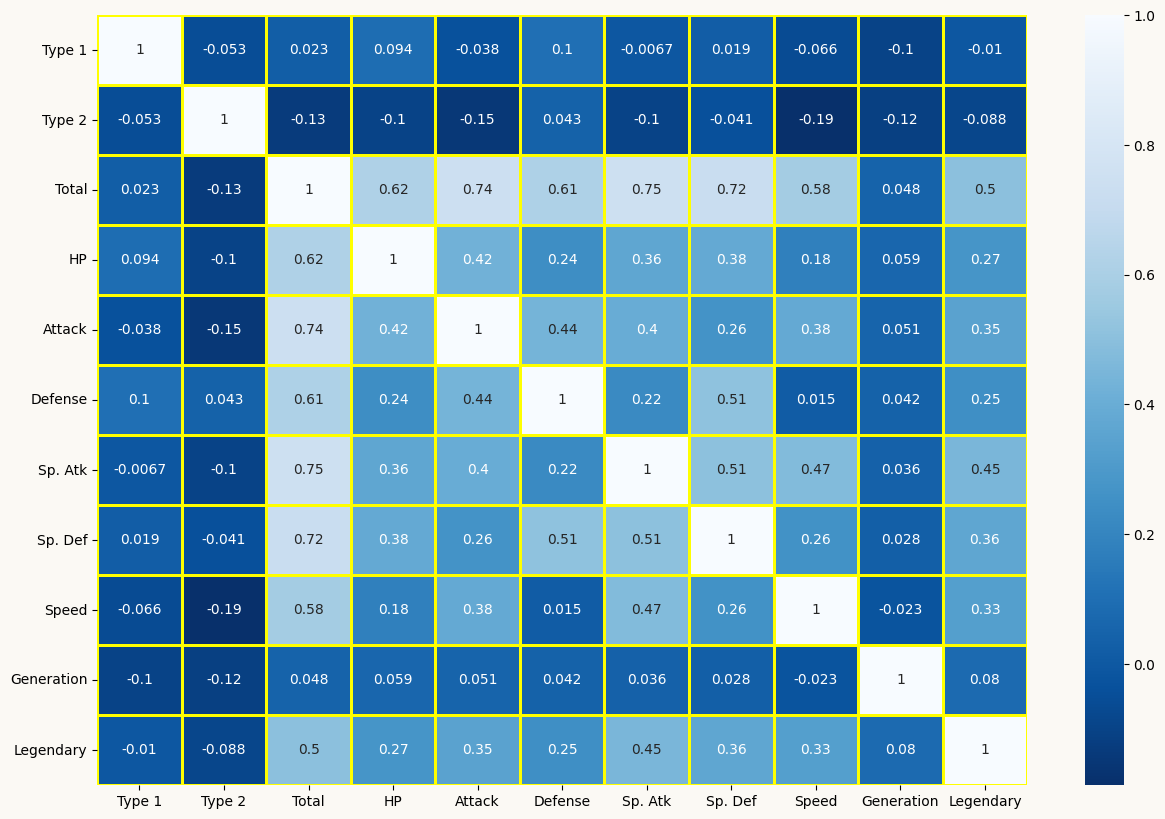

In [46]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor("#fbf9f4")
fig.set_facecolor("#fbf9f4")
sns.color_palette("mako", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap="Blues_r", linewidths=2, linecolor='yellow')

In [47]:
X = df[['Attack','Defense']].copy()

In [48]:
from sklearn.cluster import KMeans

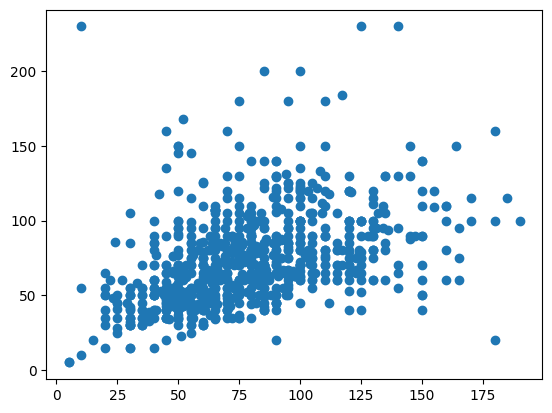

In [49]:
plt.scatter(X['Attack'],X['Defense'])

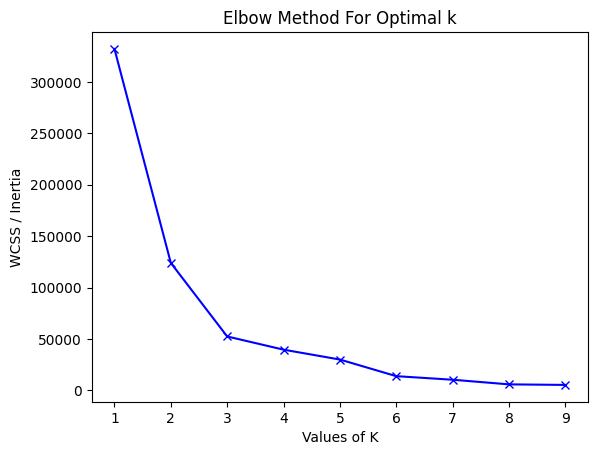

In [50]:
df_1 = pd.DataFrame(X['Attack'], X['Defense'])
SSE = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(df_1)
    SSE.append(kmeans.inertia_)
plt.plot(K, SSE, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("WCSS / Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [51]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=1, n_init='auto')
kmeans_model = kmeans.fit(X)
y_kmeans = kmeans_model.predict(X)

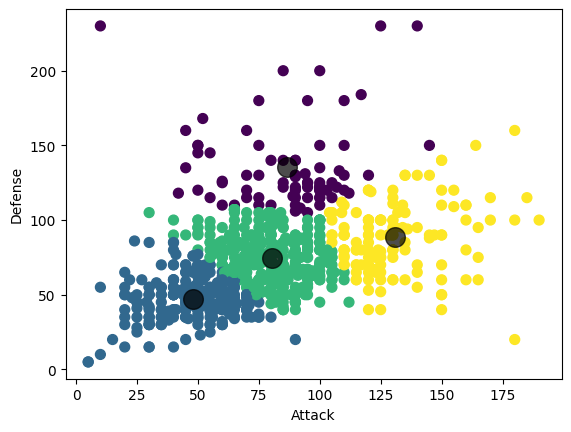

In [52]:
plt.scatter(X['Attack'], X['Defense'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.ylabel('Defense')
plt.xlabel('Attack')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

Principal Component Analysis

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scale = StandardScaler()

sdf = scale.fit_transform(df)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sdf)

pcadf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

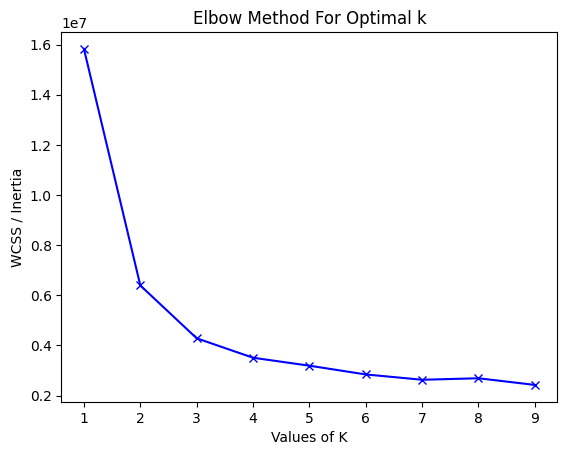

In [54]:

SSE = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)
plt.plot(K, SSE, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("WCSS / Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

Para automatizar o processo de encontrar o melhor número de clusters utilizamos o KneeLocator.

In [55]:
from kneed import KneeLocator
kl = KneeLocator(
        range(1, 10), SSE, curve="convex", direction="decreasing")

In [56]:
kmeans = KMeans(n_clusters=kl.elbow, n_init="auto")
kmeans.fit(pcadf)
cluster_labels = kmeans.labels_

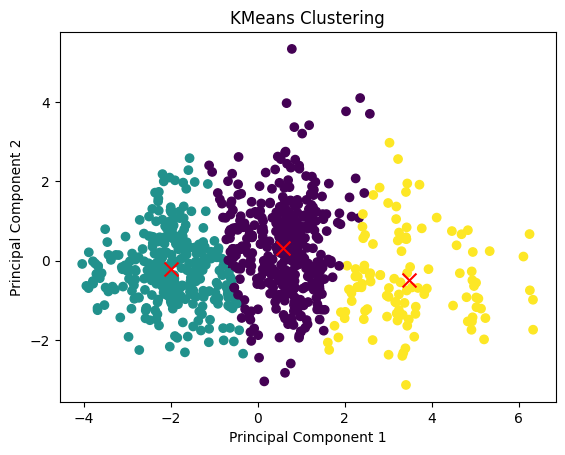

In [57]:
cluster_centers = kmeans.cluster_centers_


plt.scatter(pcadf.iloc[:, 0], pcadf.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [60]:
result = pd.concat([df, pd.Series(cluster_labels, name='Cluster')], axis=1)
result

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
0,9,14,318,45,49,49,65,65,45,1,0,1
1,9,14,405,60,62,63,80,80,60,1,0,0
2,9,14,525,80,82,83,100,100,80,1,0,0
3,9,14,625,80,100,123,122,120,80,1,0,2
4,6,12,309,39,52,43,60,50,65,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,15,4,600,50,100,150,100,150,50,6,1,2
796,15,4,700,50,160,110,160,110,110,6,1,2
797,14,8,600,80,110,60,150,130,70,6,1,2
798,14,1,680,80,160,60,170,130,80,6,1,2


In [62]:
result.describe()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
count,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,800.00000
mean,9.467500,10.491250,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,0.66875
std,5.580356,3.750334,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,0.71039
min,0.000000,0.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,0.00000
25%,5.000000,7.000000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,0.00000
50%,10.000000,12.000000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,1.00000
75%,14.000000,12.000000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,1.00000
max,17.000000,18.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,2.00000


In [69]:
cluster_1 = result[result['Cluster'] == 0]
cluster_1.describe()


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Cluster
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0,378.0
mean,9.859788,10.809524,480.089947,78.439153,87.174603,84.582011,77.825397,80.597884,71.470899,3.328042,0.0,0.0
std,5.416736,3.689646,44.728801,24.615295,25.509996,30.149581,24.509754,22.634384,26.975683,1.668337,0.0,0.0
min,0.000000,0.000000,375.000000,20.000000,5.000000,5.000000,10.000000,35.000000,5.000000,1.000000,0.0,0.0
25%,6.000000,9.000000,450.500000,65.000000,70.000000,65.000000,60.000000,65.000000,50.000000,2.000000,0.0,0.0
50%,11.000000,12.000000,485.000000,75.000000,85.000000,78.000000,76.500000,79.500000,70.000000,3.000000,0.0,0.0
75%,14.750000,12.000000,510.000000,86.000000,104.000000,100.000000,95.000000,95.000000,91.000000,5.000000,0.0,0.0
max,17.000000,18.000000,630.000000,255.000000,165.000000,230.000000,150.000000,230.000000,160.000000,6.000000,0.0,0.0


Com dados normalizados

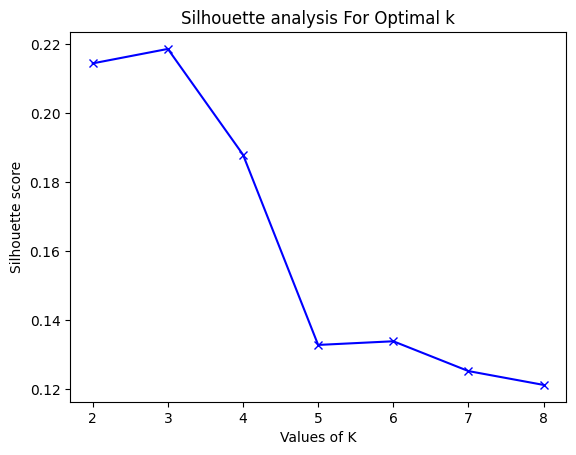

In [72]:
from sklearn.metrics import silhouette_score



range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init="auto")
    kmeans.fit(sdf)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(sdf, cluster_labels))

# Plotting moved outside of the loop
plt.plot(range_n_clusters, silhouette_avg, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()

Com dados normalizados e PCA

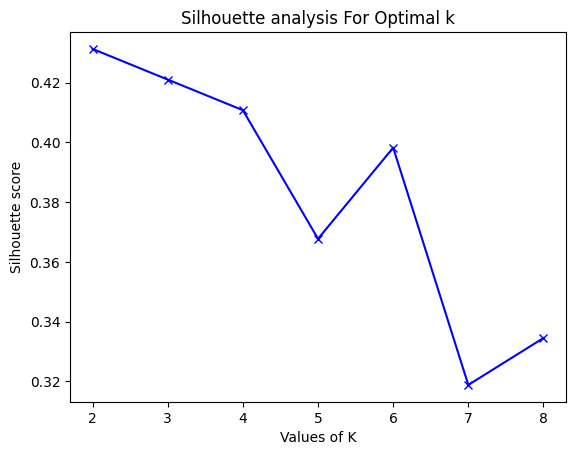

In [71]:
from sklearn.metrics import silhouette_score



range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init="auto")
    kmeans.fit(pcadf)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg.append(silhouette_score(pcadf, cluster_labels))

# Plotting moved outside of the loop
plt.plot(range_n_clusters, silhouette_avg, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("Silhouette score") 
plt.title("Silhouette analysis For Optimal k")
plt.show()